# Milestone I Natural Language Processing
## Task 1. Basic Text Pre-processing

Date: 19th May 2024

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: 
* pandas
* re
* numpy
* nltk
* chain
* matplotlib
* json

## Introduction
In this digital world, job hunting is done through popular websites such as 'seek.com.au' and 'au.indeed.com'. These websites allow job searchers to search for their required positions using keywords, salaray ranges, company names, and job categories. From the sides of employers who post these jobs, the categorisation of job advertisements is done manually which often leads in jobs being incorrectly categorised and hence reducing their job visibility and their chance to gather suitable candidates.

With the goal to eliminate these issues, automated job classification systems incorporate Natural Language Processing (NLP) for increasing viability. These systems suggest suitable categories based on the textual content of the job advertisements, which increase accuracy by reducing human errors which in turn enhances the overall user experience on popular job hunting websites. The project aims to develop an automated job advertisement classification system though three key milestones. 

## Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment

import re
import numpy as np
import json
from sklearn.datasets import load_files
from nltk.probability import *
from nltk import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from itertools import chain
import matplotlib.pyplot as plt
from collections import Counter

### 1.1 Examining and loading data
This section of the project aims to load and examine the given job description dataset in order to proceed to the pre-processing steps of the data. We observe the file names, targets, target names, their shapes and ultimately loading them into a proper datastructure to understand the data we are dealing with.

The steps for loading and examining the data are shown in the next few code blocks.

In [2]:
# Loading all the file data into the variable jobsAds
jobAds = load_files(r"data")

In [3]:
# Printing all the file names in jobAds
jobAds['filenames']

array(['data/Accounting_Finance/Job_00382.txt',
       'data/Accounting_Finance/Job_00354.txt',
       'data/Healthcare_Nursing/Job_00547.txt',
       'data/Accounting_Finance/Job_00246.txt',
       'data/Healthcare_Nursing/Job_00543.txt',
       'data/Engineering/Job_00089.txt',
       'data/Healthcare_Nursing/Job_00580.txt',
       'data/Accounting_Finance/Job_00419.txt',
       'data/Sales/Job_00767.txt', 'data/Sales/Job_00670.txt',
       'data/Accounting_Finance/Job_00263.txt',
       'data/Accounting_Finance/Job_00374.txt',
       'data/Engineering/Job_00111.txt', 'data/Sales/Job_00775.txt',
       'data/Engineering/Job_00057.txt', 'data/Sales/Job_00642.txt',
       'data/Sales/Job_00657.txt', 'data/Engineering/Job_00209.txt',
       'data/Sales/Job_00746.txt',
       'data/Healthcare_Nursing/Job_00479.txt',
       'data/Healthcare_Nursing/Job_00491.txt',
       'data/Healthcare_Nursing/Job_00454.txt',
       'data/Sales/Job_00745.txt', 'data/Sales/Job_00649.txt',
       'data/Ac

In [4]:
# Finding the number of files in the jobAds
len(jobAds['filenames'])

776

In [5]:
# Listing the target category of each file in jobAds 
jobAds['target']

array([0, 0, 2, 0, 2, 1, 2, 0, 3, 3, 0, 0, 1, 3, 1, 3, 3, 1, 3, 2, 2, 2,
       3, 3, 0, 2, 2, 2, 0, 2, 3, 1, 2, 0, 1, 3, 3, 1, 1, 0, 2, 2, 2, 2,
       0, 0, 2, 1, 3, 1, 1, 2, 2, 3, 0, 0, 1, 0, 2, 2, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 1, 3, 2, 2, 1, 0, 1, 1, 1,
       3, 0, 3, 1, 3, 2, 2, 0, 2, 3, 2, 1, 0, 1, 1, 2, 0, 3, 0, 1, 3, 2,
       1, 2, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3,
       2, 0, 0, 1, 3, 2, 0, 1, 0, 3, 1, 2, 1, 0, 0, 0, 3, 0, 1, 2, 3, 1,
       1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 2,
       1, 0, 1, 1, 1, 3, 1, 3, 1, 0, 3, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 3,
       0, 1, 1, 3, 0, 1, 0, 2, 3, 0, 2, 0, 1, 0, 1, 3, 1, 0, 1, 1, 0, 1,
       0, 1, 2, 1, 3, 1, 2, 3, 1, 1, 2, 0, 0, 1, 2, 0, 3, 2, 3, 2, 2, 3,
       0, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 0, 0, 2, 1, 2, 2, 2, 2, 1, 3, 1,
       2, 1, 2, 3, 2, 3, 0, 1, 3, 0, 2, 1, 0, 2, 1, 2, 0, 2, 1, 1, 1, 2,
       2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0, 3, 2, 1,

In [6]:
# Understanding that '0 - Accounting_Finance', '1 - Engineering', '2 - Healthcare_Nursing', '3 - Sales'
jobAds['target_names'] 

['Accounting_Finance', 'Engineering', 'Healthcare_Nursing', 'Sales']

In [7]:
# Assigning the file names in jobAds to the variable called fileNames
fileNames = jobAds['filenames']

In [8]:
# Assigning the target variable to the set of target values in jobsAd
target = set(jobAds['target'])
print(target)

{0, 1, 2, 3}


In [9]:
# Assigning the target names of the jobsAd to the variable target_names
targetNames = jobAds['target_names']
print(targetNames)

['Accounting_Finance', 'Engineering', 'Healthcare_Nursing', 'Sales']


In [10]:
# Assigning a random value of 10 to emp for test data
emp = 10

In [11]:
# Finding the file name and target value of the test data (emp = 10)
jobAds['filenames'][emp],jobAds['target'][emp]

('data/Accounting_Finance/Job_00263.txt', 0)

In [12]:
# Assigning the data and target of the jobAds to the variables jobData and targetLabels respectively
jobData, targetLabels = jobAds.data, jobAds.target

In [13]:
# Loading the data into proper data structures and getting it ready for processing
jobs = []

for file_path, target_label in zip(jobAds['filenames'], jobAds['target']):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
        
        # Extract webIndex
        webIndex_match = re.search(r'Webindex:\s*(\d+)', content)
        webIndex = webIndex_match.group(1) if webIndex_match else None
        
        # Extract title
        title_match = re.search(r'Title:\s*(.*?)\n', content)
        title = title_match.group(1) if title_match else None
        
        # Extract company name
        company_match = re.search(r'Company:\s*(.*?)\n', content)
        company = company_match.group(1) if company_match else None
        
        # Extract description
        description_match = re.search(r'Description:\s*(.*)', content, re.S)
        description = description_match.group(1).strip() if description_match else None
        
        # Collect all information in a structured format
        jobs.append({
            'webIndex': webIndex,
            'title': title,
            'company': company,
            'description': description,
            'targetLabel': jobAds['target_names'][target_label]  
        })

print("Number of job entries:", len(jobs))
# Printing out the test entries to verify
print(jobs[emp])

Number of job entries: 776
{'webIndex': '71851935', 'title': 'Investments & Treasury Controller', 'company': 'August Clarke', 'description': 'Our client, based in Eastleigh, is looking for an Investments and Treasury Controller to join their team. Duties to include: Take responsibility for transactional management, analysis and oversight of the Company’s investment portfolio, including compliance with relevant sections of the relevant policies Ensure that working capital and other liquid resources and cashflow are managed efficiently Deliver consistently against relevant KPIs and KRIs, analysing any shortfalls and putting appropriate action plans in place to remediate process issues Manage day to day relationships with the Company’s outsourced Investment Managers and Custodians ensuring that there is mutual understanding of each others’ operations, systems and developments so that business is transacted efficiently and effectively Own endtoend investment processes, ensuring that proces

### 1.2 Pre-processing data


In NLP, pre-processing of the text data is important as it influences the performance of the ML models. This task aims to perform cruicial text pre-processing on the job advertisement descriptions to make sure that that it is clean and structured for future analysis. The bacis text pre-processing steps used in this section include:
* Extracting information
* Tokenisation
* Lowercasing
* Removing stopwords
* Removing rare words
* Removing frequent 50 words
* Saving the pre-processed text
* Building the vocabulary

Through these steps, we aim to prepare a high-quality vacabulary that is free from noise and redudant information.

#### Tokenizing each job advertisement description using the regularnexpression, r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?" and converting all the words into lower case 

In [14]:
def tokenize_and_lower(jb_desc):
    # Segmenting into sentences
    sentences = sent_tokenize(jb_desc)
    # Tokenizing each sentence with a pattern that matches words, including those with hyphens and apostrophes
    pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"
    tokenizer = RegexpTokenizer(pattern) 
    token_lists = [tokenizer.tokenize(sen) for sen in sentences]
    
    # Merging them into a list of tokens and convert each token to lowercase
    tokenised_description = list(chain.from_iterable(token_lists))
    # Converting tokens to lowercase
    tokenised_description = [token.lower() for token in tokenised_description]
    return tokenised_description

In [15]:
# Running the tokenize_and_lower function on the job data
job_descriptions = [job['description'] for job in jobs if 'description' in job]
tokenised_job_descriptions = [tokenize_and_lower(desc) for desc in job_descriptions]

In [16]:
# # Printing out the test entries to verify
print(tokenised_job_descriptions[emp])

['our', 'client', 'based', 'in', 'eastleigh', 'is', 'looking', 'for', 'an', 'investments', 'and', 'treasury', 'controller', 'to', 'join', 'their', 'team', 'duties', 'to', 'include', 'take', 'responsibility', 'for', 'transactional', 'management', 'analysis', 'and', 'oversight', 'of', 'the', 'company', 's', 'investment', 'portfolio', 'including', 'compliance', 'with', 'relevant', 'sections', 'of', 'the', 'relevant', 'policies', 'ensure', 'that', 'working', 'capital', 'and', 'other', 'liquid', 'resources', 'and', 'cashflow', 'are', 'managed', 'efficiently', 'deliver', 'consistently', 'against', 'relevant', 'kpis', 'and', 'kris', 'analysing', 'any', 'shortfalls', 'and', 'putting', 'appropriate', 'action', 'plans', 'in', 'place', 'to', 'remediate', 'process', 'issues', 'manage', 'day', 'to', 'day', 'relationships', 'with', 'the', 'company', 's', 'outsourced', 'investment', 'managers', 'and', 'custodians', 'ensuring', 'that', 'there', 'is', 'mutual', 'understanding', 'of', 'each', 'others', 

In [17]:
def stats_print(tokenised_job_desc):
    # puting all the tokens in the corpus in a single list
    words = list(chain.from_iterable(tokenised_job_desc)) 
    # computing the vocabulary by converting the list of tokens to a set
    vocab = set(words) 
    lexical_diversity = len(vocab)/len(words)
    print("Vocabulary size: ",len(vocab))
    print("Total number of tokens: ", len(words))
    print("Lexical diversity: ", lexical_diversity)
    print("Total number of reviews:", len(tokenised_job_desc))
    lens = [len(article) for article in tokenised_job_desc]
    print("Average review length:", np.mean(lens))
    print("Maximun review length:", np.max(lens))
    print("Minimun review length:", np.min(lens))
    print("Standard deviation of review length:", np.std(lens))

In [18]:
# Printing the statistics of the tokenised_job_descriptions
stats_print(tokenised_job_descriptions)

Vocabulary size:  9834
Total number of tokens:  186952
Lexical diversity:  0.052601737344345076
Total number of reviews: 776
Average review length: 240.91752577319588
Maximun review length: 815
Minimun review length: 13
Standard deviation of review length: 124.97750685071483


#### Removing words with length less than 2

In [19]:
# Checking for the words whose length is less than 2 in the tokenised_job_descriptions
filtered_descriptions = [[w for w in description if len(w) < 2] for description in tokenised_job_descriptions]

# merge them together in one list
list(chain.from_iterable(filtered_descriptions))

['p',
 'a',
 'a',
 'a',
 'a',
 'a',
 'c',
 'a',
 'a',
 'a',
 's',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'k',
 'k',
 's',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'k',
 'a',
 'b',
 'b',
 'a',
 'b',
 'b',
 'a',
 'a',
 'b',
 'b',
 's',
 's',
 'a',
 'a',
 'a',
 'a',
 'a',
 'k',
 'a',
 'a',
 's',
 'a',
 'd',
 'd',
 'a',
 's',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'k',
 'a',
 's',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'c',
 'k',
 'a',
 'a',
 'k',
 'a',
 'a',
 'k',
 'a',
 'a',
 'a',
 'm',
 'm',
 'm',
 'm',
 'a',
 'a',
 'a',
 'a',
 's',
 's',
 'a',
 's',
 'a',
 's',
 'a',
 's',
 'a',
 's',
 'a',
 'a',
 'a',
 's',
 's',
 's',
 'a',
 'a',
 's',
 'a',
 'a',
 'a',
 'a',
 'a',
 'b',
 'c',
 'd',
 'e',
 'k',
 'a',
 'p',
 'l',
 'a'

In [20]:
# Removing the words with length less than 2 from the tokenised_job_descriptions
tokenized_descriptions2 = [[w for w in description if len(w) >= 2] for description in tokenised_job_descriptions]

In [21]:
# Printing the statistics of the tokenized_descriptions2
stats_print(tokenized_descriptions2)

Vocabulary size:  9808
Total number of tokens:  180913
Lexical diversity:  0.05421390392066905
Total number of reviews: 776
Average review length: 233.13530927835052
Maximun review length: 795
Minimun review length: 13
Standard deviation of review length: 121.6048654015839


#### Removing the stopwords

In [22]:
# Defining a function to load all the stopwords into a set
def load_stopwords(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        stopwords = set(file.read().split())
    return stopwords

# Loading the given stopwords
stopwords = load_stopwords('./stopwords_en.txt')


In [23]:
# Printing the stopwords
print("Loaded Stopwords:", stopwords)

Loaded Stopwords: {'themselves', 'howbeit', 'able', 'cause', 'therefore', "what's", 'zero', 'appropriate', 'inner', 'whoever', 'thoroughly', 'keeps', 'rather', 'specified', 'say', 'nor', 'afterwards', 'oh', 'together', 'eight', 'maybe', 'within', 'second', 'whence', "they're", 'sure', 'contain', 'none', 'becomes', 'anyone', 'was', 'very', 'ex', 'used', 'usually', 'quite', 'former', 'may', 'myself', 'itself', 'if', 'try', 'until', 'could', 'still', 'right', 'soon', 'its', 'n', 'r', 'etc', 'did', 'nobody', 'plus', 'which', 'inc', 'm', 'one', 'while', 'thank', 'moreover', 'vs', 'elsewhere', 'th', 'h', 'every', 'welcome', "you've", 'and', 'nowhere', 'towards', 'hers', 'otherwise', 'serious', 'somewhat', 'whole', 'above', 'probably', 'tries', 'about', 'goes', 'certainly', "c's", 'third', 'd', "weren't", "doesn't", 'rd', 'came', 'near', 'doing', 'well', 'ignored', 'yourself', 'presumably', 'i', 'so', 'whether', 'should', 'regarding', 'much', 'of', 'respectively', 'thanx', 'took', 'on', 'us',

In [24]:
# Checking for the length of the stopwords
len(stopwords)

570

In [25]:
# Defining a function to remove stopwords
def remove_stopwords(tokenized_descriptions, stopwords):
    filtered_descriptions = [
        [word for word in description if word not in stopwords]
        for description in tokenized_descriptions
    ]
    return filtered_descriptions

In [26]:
# Calling the remove_stopwords function on the tokenized_descriptions2
tokenized_descriptions3 = remove_stopwords(tokenized_descriptions2,stopwords)

In [27]:
# Printing the statistics on the tokenized_descriptions3
stats_print(tokenized_descriptions3)

Vocabulary size:  9404
Total number of tokens:  107161
Lexical diversity:  0.0877558066834016
Total number of reviews: 776
Average review length: 138.09407216494844
Maximun review length: 487
Minimun review length: 12
Standard deviation of review length: 73.07847897002313


#### Removing the words that appears only once in the document collection, based on term frequency

In [28]:
# Loading all the words into a list structure
all_words = list(chain.from_iterable(tokenized_descriptions3))
# Finding the frequency distribution of all the tokenised words
term_fd = FreqDist(all_words)

In [29]:
# Assigning set of all the words with frequency less than 2 to the variable less lessFreqWords
lessFreqWords = set([k for k, v in term_fd.items() if v < 2])

In [30]:
# Printing the less frequent words
print(lessFreqWords)

{'responsibly', 'wk', 'glass', 'philippines', 'spot', 'mathlab', 'smp', 'learnif', 'committees', 'reacting', 'saleswork', 'sheffieldsalary', 'mounted', 'barnt', 'plowe', 'steelwork', 'emission', 'twickenham', 'fluctuations', 'oesophageal', 'bran', 'megane', 'multiyear', 'altera', 'static', 'hitech', 'overnights', 'tangible', 'bingo', 'fodlon', 'curtis', 'cls', 'qcf', 'slant', 'dads', 'dean', "candidate's", 'fulltimemy', 'becks', 'offset', 'dead', 'recreations', 'gill', 'operationallyfocused', 'stocking', 'confer', 'nderstanding', 'effects', 'homeholly', 'france', 'concisely', 'mentors', 'approvals', 'coin', 'carla', 'recruitmentrevolution', 'amada', 'andover', 'hope', 'dividendscorporateactionsadministrator', 'winners', 'bees', 'kvag', 'benefitting', 'applytodaystarttomorrownewsalesfor', 'wrigley', 'mno', "europe's", 'flwyddyn', 'resultsfocussed', 'wycombe', 'pi', 'prm', 'clientside', 'pubs', 'ssl', 'advertisers', 'redditch', 'vehiclepurchasercarsales', 'matthewhayesfirstselection', 'a

In [31]:
# Printing the number of words that occur less frequently in the tokenised data
len(lessFreqWords)

4186

In [32]:
# Function to remove the less frequently occuring words from the data tokenized_descriptions3
def removeLessFreqWords(article):
    return [w for w in article if w not in lessFreqWords]

In [33]:
# Calling the removeLessFreqWords function on the tokenized_descriptions3 and assigning it to tokenized_descriptions4
tokenized_descriptions4 = [removeLessFreqWords(article) for article in tokenized_descriptions3]

In [34]:
# Printing the statistics of the tokenized_descriptions4
stats_print(tokenized_descriptions4)

Vocabulary size:  5218
Total number of tokens:  102975
Lexical diversity:  0.05067249332362224
Total number of reviews: 776
Average review length: 132.69974226804123
Maximun review length: 471
Minimun review length: 12
Standard deviation of review length: 70.3782402519735


#### Removing the top 50 most frequent words based on document frequency 

In [35]:
# Calculating the frequency distribution on all the words in tokenised data
doc_fd = FreqDist(all_words)

# Printing the 50 most frequently occuring works
mostFreqWords = doc_fd.most_common(50)

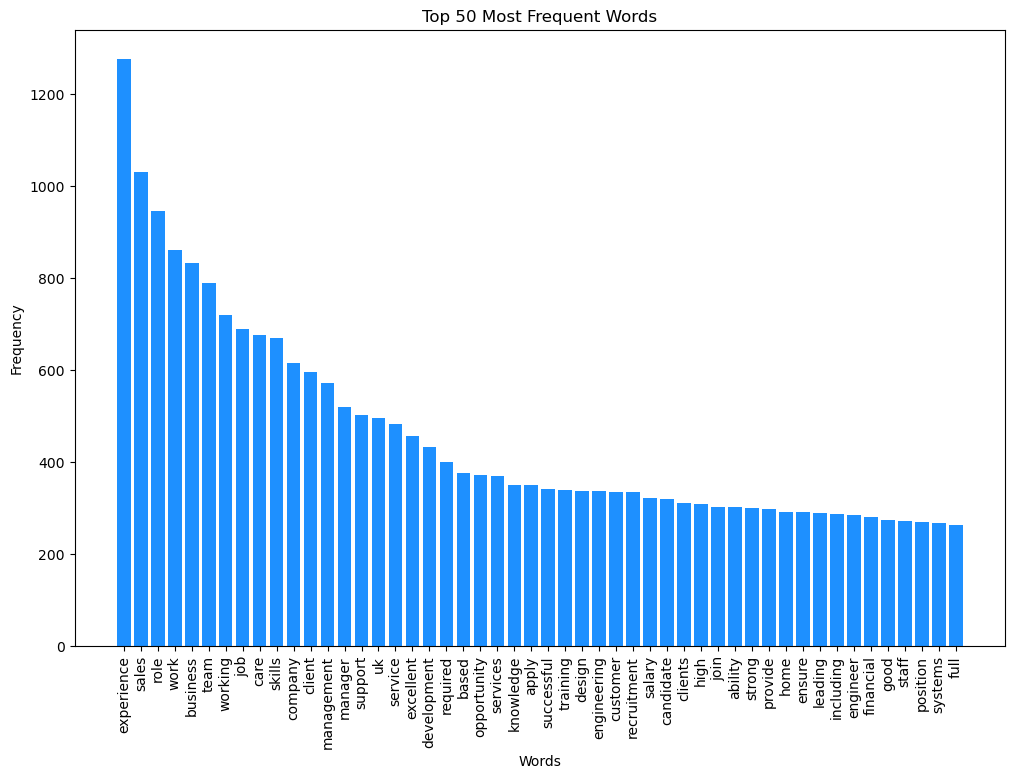

In [36]:
# Preparing the data for plotting
# Unpacking the list of tuples into two tuples
words, frequencies = zip(*mostFreqWords)  

# Creating the bar plot
plt.figure(figsize=(12, 8))  
plt.bar(words, frequencies, color='dodgerblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Most Frequent Words')
plt.xticks(rotation=90)  
plt.show()

In [37]:
# Assigning and printing the 50 frequently occuring words to the variable FreqWords
FreqWords = set([k for k, v in mostFreqWords])
FreqWords

{'ability',
 'apply',
 'based',
 'business',
 'candidate',
 'care',
 'client',
 'clients',
 'company',
 'customer',
 'design',
 'development',
 'engineer',
 'engineering',
 'ensure',
 'excellent',
 'experience',
 'financial',
 'full',
 'good',
 'high',
 'home',
 'including',
 'job',
 'join',
 'knowledge',
 'leading',
 'management',
 'manager',
 'opportunity',
 'position',
 'provide',
 'recruitment',
 'required',
 'role',
 'salary',
 'sales',
 'service',
 'services',
 'skills',
 'staff',
 'strong',
 'successful',
 'support',
 'systems',
 'team',
 'training',
 'uk',
 'work',
 'working'}

In [38]:
# Function to remove the 50 frequently occuring words in the tokenised data
def removeFreqWords(article):
    return [w for w in article if w not in FreqWords]

In [39]:
# Calling the removeFreqWords function on the tokenized_descriptions4 and assigning it to the variable tokenized_descriptions5
tokenized_descriptions5 = [removeFreqWords(article) for article in tokenized_descriptions4]

In [40]:
# Printing the statistics of the tokenized_descriptions5
stats_print(tokenized_descriptions5)

Vocabulary size:  5168
Total number of tokens:  80068
Lexical diversity:  0.06454513663386122
Total number of reviews: 776
Average review length: 103.18041237113403
Maximun review length: 390
Minimun review length: 7
Standard deviation of review length: 56.69634188671351


In [41]:
# Assigning the preprocessed data into a list and loading it to the variable finalTokenisedWords
finalTokenisedWords = list(chain.from_iterable(tokenized_descriptions5)) # we put all the tokens in the corpus in a single list
vocab = sorted(list(set(finalTokenisedWords))) # compute the vocabulary by converting the list of words/tokens to a set, i.e., giving a set of unique words

In [42]:
# Looking at the final words in the vocabulary
finalTokenisedWords

['accountant',
 'partqualified',
 'south',
 'east',
 'london',
 'manufacturing',
 'requirement',
 'accountant',
 'permanent',
 'modern',
 'offices',
 'south',
 'east',
 'london',
 'credit',
 'control',
 'purchase',
 'ledger',
 'daily',
 'collection',
 'debts',
 'phone',
 'letter',
 'email',
 'handling',
 'ledger',
 'accounts',
 'handling',
 'accounts',
 'negotiating',
 'payment',
 'terms',
 'cash',
 'reconciliation',
 'accounts',
 'adhoc',
 'administration',
 'duties',
 'person',
 'ideal',
 'previous',
 'credit',
 'control',
 'capacity',
 'possess',
 'exceptional',
 'communication',
 'part',
 'fully',
 'qualified',
 'accountant',
 'considered',
 'hedge',
 'funds',
 'london',
 'recruiting',
 'fund',
 'accountant',
 'paying',
 'outstanding',
 'benefits',
 'west',
 'end',
 'report',
 'head',
 'fund',
 'accounting',
 'number',
 'fund',
 'accountants',
 'senior',
 'fund',
 'accountants',
 'responsible',
 'fund',
 'accounting',
 'number',
 'hedge',
 'funds',
 'dealing',
 'equity',
 'related'

## Saving required outputs


##### Saving all job advertisement text and information in txt file

In [43]:
# Defining the file path
file_path = 'jobs_data.txt'

# Opening a file and writing the data
with open(file_path, 'w', encoding='utf-8') as file:
    # Converting each job dictionary into a JSON string and writing it to the file
    for job in jobs:
        json.dump(job, file)
        file.write('\n')  

#### Building a vocabulary of the cleaned job advertisement descriptions and saving it in a txt file

In [44]:
# Building a vocabulary of the cleaned job advertisement descriptions, saving it in a txt file 
from collections import Counter

# Flattening the list of filtered descriptions to get all words
all_words = [word for word in finalTokenisedWords]

# Using a Counter to count occurrences and ensure each word is unique
word_counts = Counter(all_words)

# Sorting the words 
sorted_words = sorted(word_counts.keys())

# Creating the  vocabulary with indices
vocab = {word: idx for idx, word in enumerate(sorted_words)}


In [45]:
# Checking the vocab 
vocab

{'aap': 0,
 'aaron': 1,
 'aat': 2,
 'abb': 3,
 'abenefit': 4,
 'aberdeen': 5,
 'abi': 6,
 'abilities': 7,
 'abreast': 8,
 'abroad': 9,
 'absence': 10,
 'absolute': 11,
 'ac': 12,
 'aca': 13,
 'academic': 14,
 'academy': 15,
 'acca': 16,
 'accept': 17,
 'acceptable': 18,
 'acceptance': 19,
 'accepted': 20,
 'access': 21,
 'accessible': 22,
 'accident': 23,
 'accommodates': 24,
 'accommodation': 25,
 'accomplished': 26,
 'accordance': 27,
 'account': 28,
 'accountabilities': 29,
 'accountability': 30,
 'accountable': 31,
 'accountancy': 32,
 'accountant': 33,
 'accountants': 34,
 'accounting': 35,
 'accounts': 36,
 'accreditation': 37,
 'accredited': 38,
 'accruals': 39,
 'accuracy': 40,
 'accurate': 41,
 'accurately': 42,
 'achievable': 43,
 'achieve': 44,
 'achieved': 45,
 'achievement': 46,
 'achievements': 47,
 'achiever': 48,
 'achieving': 49,
 'acii': 50,
 'acquired': 51,
 'acquisition': 52,
 'acquisitions': 53,
 'act': 54,
 'acting': 55,
 'action': 56,
 'actions': 57,
 'actionscri

In [46]:
# Calculating the length of vocabulary
len(vocab)

5168

In [47]:
# Function to save the vocabulary details to the vocab.txt file
def save_vocabulary(vocab, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        for word, index in sorted(vocab.items()):  
            file.write(f"{word}:{index}\n")

# Calling the save_vocabulary function
save_vocabulary(vocab, 'vocab.txt')

## Summary
The most fundamental step in the NLP pipeline is text pre-processing as it impacts the quality and perfomance of the ML models built on it. Through this task, we have performed the necessary steps of pre-processing on the job advertisement descriptions. The clean data now is ready for advanced text preprocessing and ML model training tasks.